* https://langchain-ai.github.io/langgraph/tutorials/introduction/
* https://langchain-ai.github.io/langgraph/how-tos/subgraph/#define-subgraphs 

In [1]:
from dotenv import load_dotenv

load_dotenv() 


True

In [2]:
from graph_builders import create_default_casual_chatbot_graph_builder 

basic_casual_chatbot_graph = create_default_casual_chatbot_graph_builder() 

basic_casual_chatbot = basic_casual_chatbot_graph.compile() 

In [4]:
from data_definitions import ReasoningState 
from chains import create_chain_for_judging_the_need_of_reasoning 

chain_4_judging_the_need_of_reasoning = create_chain_for_judging_the_need_of_reasoning(llm) 

def judge_the_need_of_rigorousness (state :ReasoningState) -> ReasoningState: 
    old_messages = state["messages"]
    assert(len(old_messages) > 0)

    last_user_message = old_messages[-1]
    judgement = chain_4_judging_the_need_of_reasoning.invoke({"input": last_user_message})
    assert(type(judgement) is bool)

    print(f"{judgement = }")

    if (judgement): 
        return {
            "messages": old_messages
        }
    
    else: 
        casual_llm_answer = llm.invoke(old_messages)
        return {
            "messages": old_messages + [casual_llm_answer]
        }

graph_builder.add_node("judge_the_need_of_rigorousness", judge_the_need_of_rigorousness)

In [5]:
# graph_builder.add_edge(START, "judge_the_need_of_rigorousness")
# graph_builder.add_edge("judge_the_need_of_rigorousness", END)
# llm_graph = graph_builder.compile() 

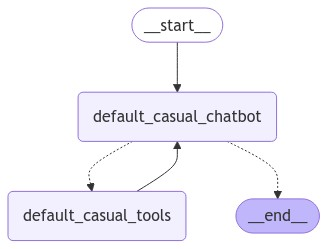

In [3]:
from IPython.display import Image, display

try:
    display(Image(basic_casual_chatbot.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [6]:
def stream_graph_updates(user_input: str):
    for event in basic_casual_chatbot.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break

    stream_graph_updates(user_input)

Assistant: I'm just a computer program, so I don't have feelings or emotions, but I'm here to help you with anything you need. How can I assist you today?
Goodbye!
